# TF-IDF
Natural Language Processing (NLP) is a sub-field of artificial intelligence that deals with understanding and processing human language. In light of new advancements in machine learning, many organizations have begun applying natural language processing for translation, chatbots and candidate filtering.

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
f1=open('testdoc.txt','r')
f2=open('testdoc2.txt','r')

In [2]:
documentA = f1.read()
documentB = f2.read()

Machine learning algorithms cannot work with raw text directly. Rather, the text must be converted into vectors of numbers. In natural language processing, a common technique for extracting features from text is to place all of the words that occur in the text in a bucket. This aproach is called a bag of words model or BoW for short. It’s referred to as a “bag” of words because any information about the structure of the sentence is lost.

In [3]:
bagOfWordsA = documentA.split(' ')
bagOfWordsB = documentB.split(' ')

In [4]:
uniqueWords = set(bagOfWordsA).union(set(bagOfWordsB))

In [5]:
numOfWordsA = dict.fromkeys(uniqueWords, 0)
for word in bagOfWordsA:
    numOfWordsA[word] += 1
numOfWordsB = dict.fromkeys(uniqueWords, 0)
for word in bagOfWordsB:
    numOfWordsB[word] += 1

Another problem with the bag of words approach is that it doesn’t account for noise. In other words, certain words are used to formulate sentences but do not add any semantic meaning to the text. For example, the most commonly used word in the english language is the which represents 7% of all words written or spoken. You couldn’t make deduce anything about a text given the fact that it contains the word the. On the other hand, words like good and awesome could be used to determine whether a rating was positive or not.

In natural language processing, useless words are referred to as stop words. The python natural language toolkit library provides a list of english stop words.

In [6]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

# Term Frequency (TF)
The number of times a word appears in a document divded by the total number of words in the document. Every document has its own term frequency.

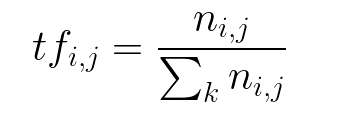

In [7]:
def computeTF(wordDict, bagOfWords):
    tfDict = {}
    bagOfWordsCount = len(bagOfWords)
    for word, count in wordDict.items():
        tfDict[word] = count / float(bagOfWordsCount)
    return tfDict

In [8]:
tfA = computeTF(numOfWordsA, bagOfWordsA)
tfB = computeTF(numOfWordsB, bagOfWordsB)

# Inverse Data Frequency (IDF)
The log of the number of documents divided by the number of documents that contain the word w. Inverse data frequency determines the weight of rare words across all documents in the corpus.
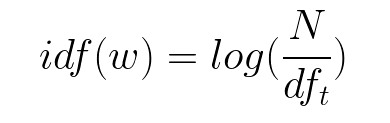

In [9]:
def computeIDF(documents):
    import math
    N = len(documents)
    
    idfDict = dict.fromkeys(documents[0].keys(), 0)
    for document in documents:
        for word, val in document.items():
            if val > 0:
                idfDict[word] += 1
    
    for word, val in idfDict.items():
        idfDict[word] = math.log(N / float(val))
    return idfDict

In [10]:
idfs = computeIDF([numOfWordsA, numOfWordsB])

Lastly, the TF-IDF is simply the TF multiplied by IDF.

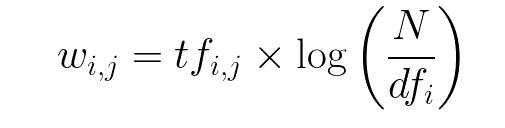
<img src="tfidf.png">

In [ ]:
def computeTFIDF(tfBagOfWords, idfs):
    tfidf = {}
    for word, val in tfBagOfWords.items():
        tfidf[word] = val * idfs[word]
    return tfidf

In [ ]:
tfidfA = computeTFIDF(tfA, idfs)
tfidfB = computeTFIDF(tfB, idfs)
df = pd.DataFrame([tfidfA, tfidfB])

In [ ]:
df

,the,out,sat,man,children,around,went,fire,for,a,walk
0,0.0,0.099021,0.000000,0.099021,0.000000,0.000000,0.099021,0.000000,0.099021,0.099021,0.099021
1,0.0,0.000000,0.115525,0.000000,0.115525,0.115525,0.000000,0.115525,0.000000,0.000000,0.000000


In [ ]:

vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform([documentA, documentB])
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
df

,around,children,fire,for,man,out,sat,the,walk,went
0,0.000000,0.000000,0.000000,0.42616,0.42616,0.42616,0.000000,0.303216,0.42616,0.42616
1,0.407401,0.407401,0.407401,0.00000,0.00000,0.00000,0.407401,0.579739,0.00000,0.00000
